In [1]:
using JLD
using PyPlot

In [2]:
archivo=load("../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2-CM.jld")
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];

In [6]:
function leeunmegaarrayarchivos(NomineGeneralis::AbstractString, desde=35, hasta=501)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
            readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
    end


function leunjlddeCM(datos, desde=1, hasta=300)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
        readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
end



leunjlddeCM (generic function with 3 methods)

In [7]:
DatosCMP[99]

94×3 Array{Float64,2}:
 14.5913   13.0       18.2248 
 47.0208    1.0       49.1933 
 62.5856    5.01797   37.3977 
 24.8457   55.5787    49.0017 
 12.531    54.5648    24.0163 
 54.3702   17.2734    22.6476 
  9.32503   9.35457   56.525  
 62.8807   60.1575    25.9703 
 28.257    41.8538   142.636  
 43.8689   59.7366    21.5165 
 23.7956    6.94079  240.387  
 53.9299    7.96302  105.199  
  8.05734   3.69633  144.708  
  ⋮                           
  7.637    57.0        9.83984
 50.3426   51.7049    55.8505 
 19.4123   29.0511    39.3362 
 59.9946   16.858     21.4021 
 47.311    26.6904   170.069  
 15.7655   59.9625    33.4178 
  2.59295  63.7248    15.7672 
  4.51767   8.30373   18.4594 
 31.9679   11.2922    62.1465 
 42.4545   63.0607    76.6045 
 55.9218   48.3915    95.195  
 36.8439   29.3028    98.9685 

In [8]:
function dist2D(x,y)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

dist2D (generic function with 1 method)

In [21]:
function encuentraTrayectorias(Datos, mincadena=20, mingordo=2.0, desde=1,hasta=20)

toleradist=4.0*sqrt(2)
tau=1
t=1
j=1
Catenario=Dict{Integer, Array{Any}}()
Cadena=[0 0 0 0]
tnum=1
CopiaMegaArray=deepcopy(Datos);
NumFrames=length(Datos)
FakeNumFrames=NumFrames



while t <= FakeNumFrames-1 
    
    tau=t
    
    @label arrrrh
 
        if(CopiaMegaArray[tau]==[])
            
            jmax,nada=0,0
        else
          
     jmax,nada= size(CopiaMegaArray[tau])
        end
    
        
    while j <=jmax && tau<FakeNumFrames
            
            if abs(CopiaMegaArray[tau][j,3]) > mingordo
                
            Eslabon=[transpose(CopiaMegaArray[tau][j,:]) tau]
            Cadena=vcat(Cadena, Eslabon)
         #   println("Papa t: ", t, "  tau: ", tau, " y  j: ",j )
            mindist=2
            kasterisco=1
                
                if CopiaMegaArray[tau+1]==[]
                    kmax,nada=0,0
                else
                kmax, nada= size(CopiaMegaArray[tau+1])
                end
                huboalgo=false
          
        #    kmax=5
            
            for k=1:kmax
                
                EslabonTentativo=CopiaMegaArray[tau+1][k,:]
            #    println(EslabonTentativo)
                    if abs(EslabonTentativo[3])>mingordo
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        mindist=dist
                        kasterisco=k
                        
                       # println(kasterisco, "=k*", k, "=k")
                        huboalgo=true
                    end
                end
            
            end    
            
            if huboalgo && mindist<toleradist
                #quitamos el anterior
                CopiaMegaArray[tau][j,3]=0.0000 
               # println(mindist," ", t, " ", tau+1 ," ", kasterisco )
                
                if tau+1<FakeNumFrames
                    tau+=1
                    j=kasterisco
      #              println("Pepe t: ", t, "  tau: ", tau, " y  j: ",j )
                    @goto arrrrh
                
                else
                    
                    Eslabon=[transpose(CopiaMegaArray[tau+1][kasterisco,:]) tau+1]
                    Cadena=vcat(Cadena, Eslabon)
      #              println("Pipi t: ", t, "  t: ", t, " y  j: ",j )
                    j+=1
                    tau=t
                    
                    if size(Cadena)[1]>mincadena
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                    end
                    
                    Cadena=[0 0 0 0]
                    @goto arrrrh
                end
                                
            else
                
                if size(Cadena)[1]>mincadena
                    # veamos si funciona  mejor como dict 
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                end
                Cadena=[0 0 0 0]
                j+=1
                tau=t
                @goto arrrrh
            end
                       
        end #cierra sobre el if de  la masa 
                
        j+=1                    
        tau=t
    
    end
    @label urrr
      
    j=1
    t+=1
    tau=t
    Cadena=[0 0 0 0]
        end 
    
    return Catenario
end

encuentraTrayectorias (generic function with 5 methods)

In [29]:
#Recuerda el segundo argumento es la longitud mínima de la cadena
@time CatenarioPositivo=encuentraTrayectorias(DatosCMP,3,100,2,2000);


 30.655556 seconds (41.56 M allocations: 1.091 GiB, 1.61% gc time)


In [30]:
CatenarioNegativo=encuentraTrayectorias(DatosCMN,3,100,2,2000);

In [32]:
save("LFP_Promedio_est_con6-Tray.jld", "CatenarioNegativo", CatenarioNegativo, "CatenarioPositivo", CatenarioPositivo)

In [31]:
length(CatenarioPositivo), length(CatenarioNegativo)

(2272, 2111)

Set(Array{Any,N} where N[Any[60.6101 7.67803 -49.6458 326.0; 60.264 8.24817 -61.078 327.0; … ; 60.743 7.37732 -92.0724 329.0; 60.433 8.69014 -55.7771 330.0], Any[20.7213 19.7644 -34.81 99.0; 21.366 19.4988 -28.1373 100.0; … ; 22.3641 19.0229 -21.6833 102.0; 23.4264 18.7161 -17.1871 103.0], Any[57.6337 57.365 -25.2505 548.0; 58.1375 57.3054 -16.852 549.0; … ; 58.5376 56.6961 -21.7564 551.0; 59.9782 56.906 -16.533 552.0], Any[1.12761 43.5351 -19.8307 1380.0; 1.11619 44.2232 -16.7393 1381.0; 1.1805 44.3982 -15.7527 1382.0], Any[9.3469 27.5951 -18.6983 442.0; 9.45362 27.5413 -19.8844 443.0; 9.57218 27.5674 -18.6076 444.0], Any[7.35956 29.0882 -20.9723 1682.0; 8.05965 29.5735 -28.2992 1683.0; … ; 10.0671 27.6051 -26.6671 1690.0; 9.7535 27.7615 -36.876 1691.0], Any[13.5792 40.3572 -57.9073 821.0; 13.7364 40.2286 -54.3413 822.0; … ; 14.0638 40.2105 -38.8227 824.0; 14.4502 40.2633 -32.7117 825.0], Any[15.1495 14.4507 -25.9546 473.0; 14.952 14.5132 -16.9169 474.0; … ; 14.5579 14.5115 -38.1116 4

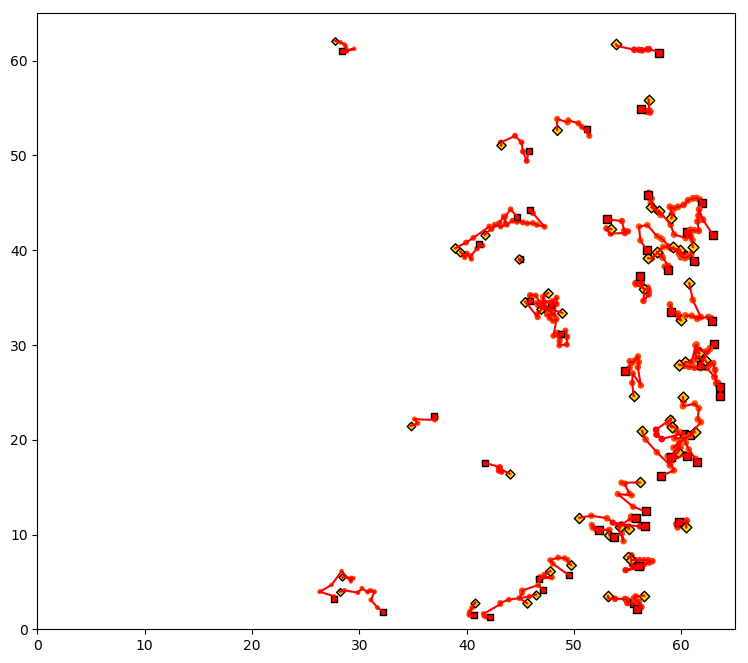

In [42]:
PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=25
minlong=7
maxlong=100
#colores=Union{}

for p in values(CatenarioPositivo)
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong) && longus < maxlong
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=0.25, color="r")
        colores=scatter(xxpos,yypos, s=gordura*0.4, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*0.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" )
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="gold", marker="D", label="Final" )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

In [36]:
values(CatenarioNegativo)

Base.ValueIterator for a Dict{Integer,Array{Any,N} where N} with 2111 entries. Values:
  Any[53.5033 32.4076 -133.551 1621.0; 53.4892 32.7307 -136.299 1622.0; 54.1822…
  Any[55.8665 12.0067 -225.197 1672.0; 56.5207 12.1896 -224.462 1673.0; 56.4422…
  Any[6.59196 45.59 -103.91 355.0; 7.14074 46.3508 -141.1 356.0; … ; 5.35004 47…
  Any[45.0799 9.86538 -922.799 1307.0; 45.3606 10.2127 -893.363 1308.0; 45.7932…
  Any[47.305 5.74263 -285.768 1113.0; 48.9043 6.26266 -245.747 1114.0; 48.5071 …
  Any[11.6321 58.9727 -112.206 1998.0; 11.8719 59.5696 -128.812 1999.0; 10.7445…
  Any[20.1788 28.8426 -120.598 1318.0; 20.8275 28.6643 -104.927 1319.0; 18.9634…
  Any[8.32063 19.8652 -172.682 46.0; 8.5374 19.9342 -154.231 47.0; 8.4098 20.34…
  Any[55.0209 25.3078 -155.68 1597.0; 56.074 26.8711 -202.385 1598.0; … ; 55.68…
  Any[55.7124 14.0536 -2754.54 1150.0; 55.6006 13.8985 -3013.4 1151.0; 55.1074 …
  Any[7.82534 44.3645 -186.664 94.0; 7.53528 44.3108 -194.993 95.0; 7.60553 44.…
  Any[24.7877 14.4522 